# Classification - Conclusion

##### Ici nous allons conclure sur l'approche globale de clustering des villes par type climat en conduisant un exercice de synthèse des différents résultats obtenus dans les notebooks précédents.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt


import geopandas as gpd
from shapely.geometry import Point

from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.preprocessing import LabelEncoder


# 1. Synthèse des exercices de classifications précédents

In [2]:
resultats_1L=pd.read_csv("kmeans_1L.csv")

In [3]:
resultats_2L=pd.read_csv("tkmeans_2L.csv")

In [4]:
resultats_3L=pd.read_csv("tkmeans_3L.csv")

In [5]:
resultats=pd.DataFrame()

In [6]:
resultats['Location']=resultats_1L['Location']

In [7]:
resultats['Koppen']=resultats_2L['Climat_Koppen']

In [8]:
resultats['1L']=resultats_1L['classes_ord']
resultats['2L']=resultats_2L['Clusters']
resultats['3L']=resultats_3L['Clusters_labels']

In [9]:
resultats

,Location,Koppen,1L,2L,3L
0,Adelaide,Csa,1,1,3
1,Albany,Csb,8,1,7
2,Albury,Cfa,3,1,0
3,AliceSprings,BSh,2,1,2
4,BadgerysCreek,Cfa,4,2,1
5,Ballarat,Cfb,7,1,6
6,Bendigo,Cfb,3,1,5
7,Brisbane,Cfa,4,4,4
8,Cairns,Am,0,6,11
9,Canberra,Cfb,3,1,9


# 2. Concaténation des résultats sous un cluster global

In [10]:
resultats["Global_Clusters"]=resultats["1L"].map(str)+'-'+resultats["2L"].map(str)+'-'+resultats["3L"].map(str)
resultats

,Location,Koppen,1L,2L,3L,Global_Clusters
0,Adelaide,Csa,1,1,3,1-1-3
1,Albany,Csb,8,1,7,8-1-7
2,Albury,Cfa,3,1,0,3-1-0
3,AliceSprings,BSh,2,1,2,2-1-2
4,BadgerysCreek,Cfa,4,2,1,4-2-1
5,Ballarat,Cfb,7,1,6,7-1-6
6,Bendigo,Cfb,3,1,5,3-1-5
7,Brisbane,Cfa,4,4,4,4-4-4
8,Cairns,Am,0,6,11,0-6-11
9,Canberra,Cfb,3,1,9,3-1-9


In [11]:
resultats_table = pd.crosstab(resultats["Koppen"],resultats["Global_Clusters"])


In [12]:
pd.set_option('display.max_columns',None)
resultats_table

Global_Clusters,0-2-11,0-6-11,0-7-11,0-8-11,1-1-0,1-1-2,1-1-3,1-1-5,1-9-8,2-1-2,3-1-0,3-1-3,3-1-5,3-1-9,4-2-1,4-4-4,5-1-5,5-1-6,5-1-7,5-4-1,5-5-1,6-0-1,6-3-1,6-3-4,6-4-4,6-8-1,7-1-6,7-3-10,8-1-5,8-1-6,8-1-7,9-4-1
Koppen,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Am,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aw,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BSh,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BSk,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bsk,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bwh,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cfa,0,0,0,0,0,1,0,0,0,0,2,0,0,0,3,1,0,0,0,2,1,1,1,1,1,0,0,0,0,0,0,1
Cfb,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,1,1,1,0,0,0,0,0,0,1,1,0,2,1,0,0
Cfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [13]:
le=LabelEncoder()
le.fit(resultats["Global_Clusters"])
resultats["Global_Clusters_enc"]=np.array(le.transform(resultats["Global_Clusters"]))

# 3. Encodage des nouveaux clusters globaux

In [14]:
resultats_table = pd.crosstab(resultats["Koppen"],resultats["Global_Clusters_enc"])

In [15]:
resultats_table

Global_Clusters_enc,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Koppen,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Am,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aw,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BSh,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BSk,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bsk,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bwh,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cfa,0,0,0,0,0,1,0,0,0,0,2,0,0,0,3,1,0,0,0,2,1,1,1,1,1,0,0,0,0,0,0,1
Cfb,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,1,1,1,0,0,0,0,0,0,1,1,0,2,1,0,0
Cfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# 4. Détails des résultats par classe de climat Koppen

In [16]:
resultats_table = pd.crosstab(resultats[resultats["Koppen"]=="Am"]["Koppen"],resultats["Global_Clusters_enc"])
resultats_table

Global_Clusters_enc,1
Koppen,
Am,1


In [17]:
resultats_table = pd.crosstab(resultats[resultats["Koppen"]=="Aw"]["Koppen"],resultats["Global_Clusters_enc"])
resultats_table

Global_Clusters_enc,0,2,3
Koppen,,,
Aw,1,1,1


In [18]:
resultats_table = pd.crosstab(resultats[resultats["Koppen"]=="BSh"]["Koppen"],resultats["Global_Clusters_enc"])
resultats_table

Global_Clusters_enc,5,9
Koppen,,
BSh,1,2


In [19]:
resultats_table = pd.crosstab(resultats[resultats["Koppen"]=="BSk"]["Koppen"],resultats["Global_Clusters_enc"])
resultats_table

Global_Clusters_enc,4,11
Koppen,,
BSk,1,1


In [20]:
resultats_table = pd.crosstab(resultats[resultats["Koppen"]=="Bsk"]["Koppen"],resultats["Global_Clusters_enc"])
resultats_table

Global_Clusters_enc,7,11
Koppen,,
Bsk,1,1


In [21]:
resultats_table = pd.crosstab(resultats[resultats["Koppen"]=="Bwh"]["Koppen"],resultats["Global_Clusters_enc"])
resultats_table

Global_Clusters_enc,9
Koppen,
Bwh,1


In [22]:
resultats_table = pd.crosstab(resultats[resultats["Koppen"]=="Cfa"]["Koppen"],resultats["Global_Clusters_enc"])
resultats_table

Global_Clusters_enc,5,10,14,15,19,20,21,22,23,24,31
Koppen,,,,,,,,,,,
Cfa,1,2,3,1,2,1,1,1,1,1,1


In [23]:
resultats_table = pd.crosstab(resultats[resultats["Koppen"]=="Cfb"]["Koppen"],resultats["Global_Clusters_enc"])
resultats_table

Global_Clusters_enc,12,13,16,17,18,25,26,28,29
Koppen,,,,,,,,,
Cfb,1,2,1,1,1,1,1,2,1


In [24]:
resultats_table = pd.crosstab(resultats[resultats["Koppen"]=="Cfc"]["Koppen"],resultats["Global_Clusters_enc"])
resultats_table

Global_Clusters_enc,27
Koppen,
Cfc,1


In [25]:
resultats_table = pd.crosstab(resultats[resultats["Koppen"]=="Csa"]["Koppen"],resultats["Global_Clusters_enc"])
resultats_table

Global_Clusters_enc,6
Koppen,
Csa,1


In [26]:
resultats_table = pd.crosstab(resultats[resultats["Koppen"]=="Csb"]["Koppen"],resultats["Global_Clusters_enc"])
resultats_table

Global_Clusters_enc,8,18,26,29,30
Koppen,,,,,
Csb,3,1,1,2,2


In [27]:
resultats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Location             49 non-null     object
 1   Koppen               49 non-null     object
 2   1L                   49 non-null     int64 
 3   2L                   49 non-null     int64 
 4   3L                   49 non-null     int64 
 5   Global_Clusters      49 non-null     object
 6   Global_Clusters_enc  49 non-null     int32 
dtypes: int32(1), int64(3), object(3)
memory usage: 2.6+ KB


In [28]:
resultats["Global_Clusters_enc"]=resultats["Global_Clusters_enc"].astype(str)

In [29]:
resultats

,Location,Koppen,1L,2L,3L,Global_Clusters,Global_Clusters_enc
0,Adelaide,Csa,1,1,3,1-1-3,6
1,Albany,Csb,8,1,7,8-1-7,30
2,Albury,Cfa,3,1,0,3-1-0,10
3,AliceSprings,BSh,2,1,2,2-1-2,9
4,BadgerysCreek,Cfa,4,2,1,4-2-1,14
5,Ballarat,Cfb,7,1,6,7-1-6,26
6,Bendigo,Cfb,3,1,5,3-1-5,12
7,Brisbane,Cfa,4,4,4,4-4-4,15
8,Cairns,Am,0,6,11,0-6-11,1
9,Canberra,Cfb,3,1,9,3-1-9,13


# 5. Regroupement des clusters communs à chaque type de climat

In [30]:
resultats["Final_Clusters"]=resultats['Global_Clusters_enc'].map({"1":"01",
                                                     "0":"02",
                                                     "2":"02",
                                                    "3":"02",
                                                    "5":"03",
                                                    "4":"04",
                                                    "7":"05",
                                                    "11":"05",
                                                    "9":"06",
                                                    "10":"07",
                                                    "14":"07",
                                                    "15":"07",
                                                    "19":"07",
                                                                "20":"07",
                                                                "21":"07",
                                                                "22":"07",
                                                                "23":"07",
                                                                "24":"07",
                                                                "31":"07",
                                                                "12":"08",
                                                    "13":"08",
                                                                "16":"08",
                                                                "17":"08",
                                                                "25":"08",
                                                                "26":"08",
                                                                "28":"08",
                                                                "27":"09",
                                                    "6":"10",
                                                                "8":"11",
                                                                "18":"11",
                                                                "29":"11",
                                                    "30":"11"})

In [31]:
resultats

,Location,Koppen,1L,2L,3L,Global_Clusters,Global_Clusters_enc,Final_Clusters
0,Adelaide,Csa,1,1,3,1-1-3,6,10
1,Albany,Csb,8,1,7,8-1-7,30,11
2,Albury,Cfa,3,1,0,3-1-0,10,07
3,AliceSprings,BSh,2,1,2,2-1-2,9,06
4,BadgerysCreek,Cfa,4,2,1,4-2-1,14,07
5,Ballarat,Cfb,7,1,6,7-1-6,26,08
6,Bendigo,Cfb,3,1,5,3-1-5,12,08
7,Brisbane,Cfa,4,4,4,4-4-4,15,07
8,Cairns,Am,0,6,11,0-6-11,1,01
9,Canberra,Cfb,3,1,9,3-1-9,13,08


# 6. Visulations des climats pour chacune des villes

In [32]:
aus_town_gps = pd.read_csv("aus_town_gps.csv",sep=",")
aus_town_gps
resultats = pd.merge(resultats, aus_town_gps, how='left', left_on="Location",right_on="Location")

In [33]:
import geopandas as gpd
from shapely.geometry import Point

Contour_Aus = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
Contour_Aus = Contour_Aus[Contour_Aus["name"] == "Australia"]

geometry = [Point(xy) for xy in zip(resultats['Longitude'], resultats['Latitude'])]
geo_df = gpd.GeoDataFrame(resultats, geometry=geometry)

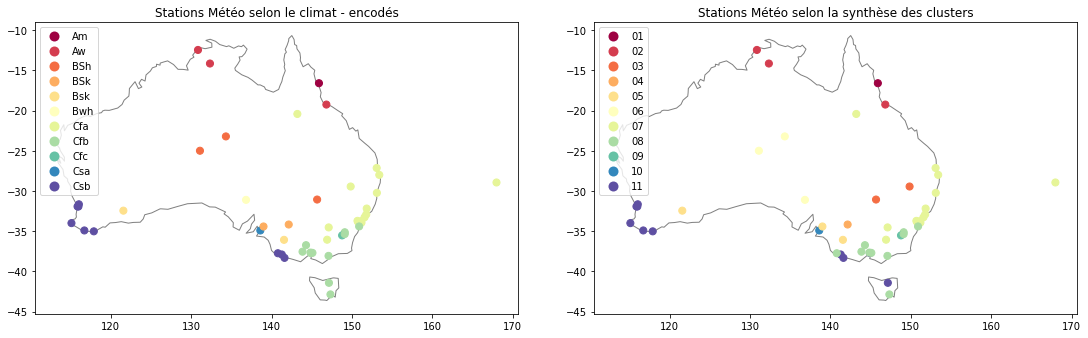

In [34]:
fig = plt.figure(constrained_layout=True, figsize=(15, 15))
subfigs = fig.subfigures(1, 2, wspace=0.07)

ax=subfigs[0].subplots(1, 1)
Contour_Aus.plot(ax=ax,color="None",edgecolor="Grey")  
ax.title.set_text('Stations Météo selon le climat')
geo_df.plot(ax=ax,markersize=50, cmap='Spectral', column="Koppen",legend=True);

ax1=subfigs[1].subplots(1, 1)
Contour_Aus.plot(ax=ax1,color="None",edgecolor="Grey")  
ax1.title.set_text('Stations Météo selon la synthèse des clusters')
geo_df.plot(ax=ax1,markersize=50, cmap='Spectral', column="Final_Clusters",legend=True);